In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# train_test split
from sklearn.model_selection import train_test_split

In [ ]:
data_bank = pd.read_csv(r'/content/bank_data.csv')

In [ ]:
data_bank.head(10)


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0.0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0.0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0.0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0.0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0.0
5,0,'C1315400589','3','F','28007','M348934600','28007','es_transportation',25.81,0.0
6,0,'C765155274','1','F','28007','M348934600','28007','es_transportation',9.10,0.0
7,0,'C202531238','4','F','28007','M348934600','28007','es_transportation',21.17,0.0
8,0,'C105845174','3','M','28007','M348934600','28007','es_transportation',32.40,0.0
9,0,'C39858251','5','F','28007','M348934600','28007','es_transportation',35.40,0.0


##EDA

In [ ]:
data_bank.shape

(230667, 10)

In [ ]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230667 entries, 0 to 230666
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         230667 non-null  int64  
 1   customer     230666 non-null  object 
 2   age          230666 non-null  object 
 3   gender       230666 non-null  object 
 4   zipcodeOri   230666 non-null  object 
 5   merchant     230666 non-null  object 
 6   zipMerchant  230666 non-null  object 
 7   category     230666 non-null  object 
 8   amount       230666 non-null  float64
 9   fraud        230666 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 17.6+ MB


In [ ]:
data_bank.describe()

,step,amount,fraud
count,230667.000000,230666.000000,230666.000000
mean,40.424859,38.974565,0.013535
std,22.352668,123.234925,0.115549
min,0.000000,0.000000,0.000000
25%,21.000000,13.750000,0.000000
50%,41.000000,26.960000,0.000000
75%,60.000000,42.710000,0.000000
max,78.000000,7665.560000,1.000000


In [ ]:
# Check for null values in the DataFrame
null_values = data_bank.isnull().sum()

# Display columns with null values and their counts
null_values = null_values[null_values > 0]
print("Columns with null values:")
print(null_values)


Columns with null values:
customer       1
age            1
gender         1
zipcodeOri     1
merchant       1
zipMerchant    1
category       1
amount         1
fraud          1
dtype: int64


In [ ]:
# Drop rows with any null values
data_bank = data_bank.dropna()

# Verify that there are no more null values
print("Null values after dropping rows:")
print(data_bank.isnull().sum())


Null values after dropping rows:
step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64


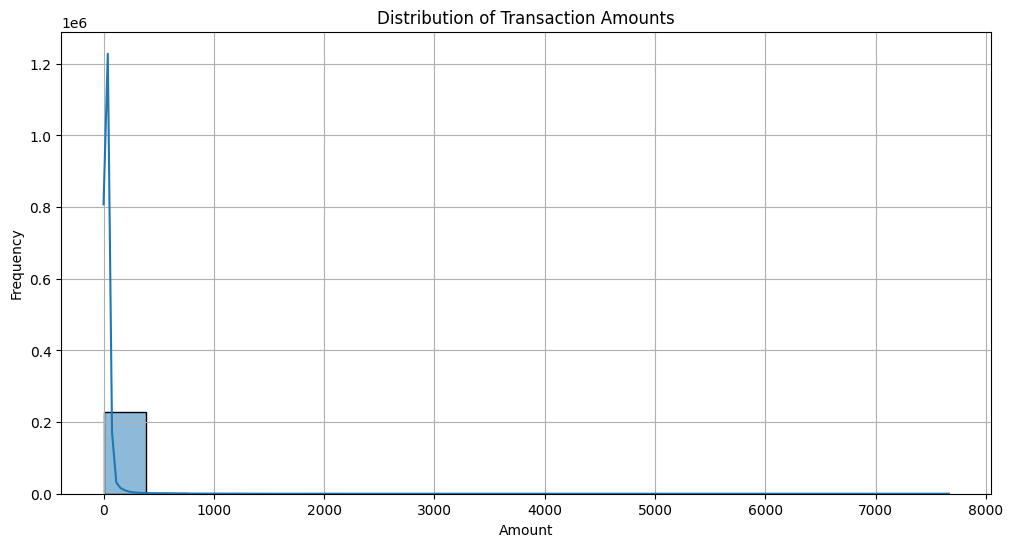

In [ ]:
#Distribution of transaction amounts
plt.figure(figsize=(12, 6))
sns.histplot(data_bank['amount'], bins=20, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


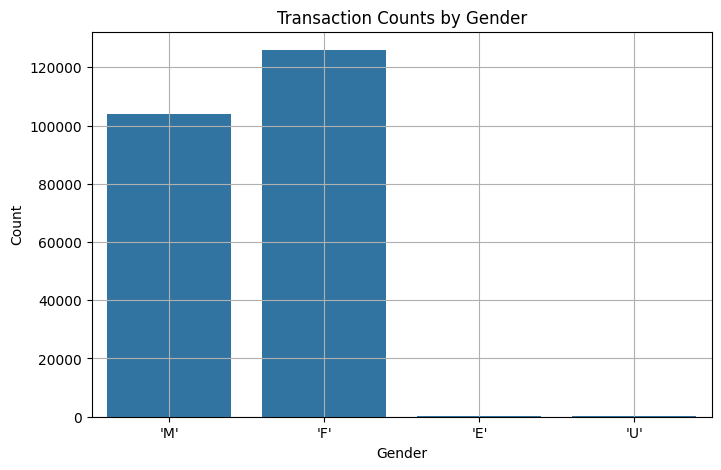

In [ ]:
#Transaction counts by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=data_bank)
plt.title('Transaction Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()


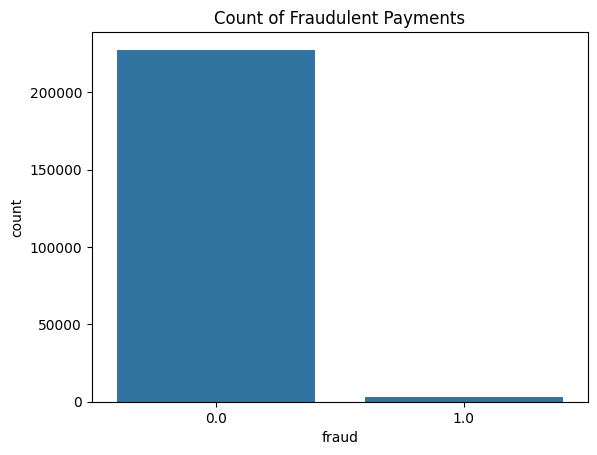

Number of normal examples:  227544
Number of fradulent examples:  3122


In [ ]:
# Create two dataframes with fraud and non-fraud data
fraud_data = data_bank.loc[data_bank.fraud == 1]
Nonfraud_data = data_bank.loc[data_bank.fraud == 0]

sns.countplot(x="fraud",data=data_bank)
plt.title("Count of Fraudulent Payments")
plt.show()
print("Number of normal examples: ",Nonfraud_data.fraud.count())
print("Number of fradulent examples: ",fraud_data.fraud.count())


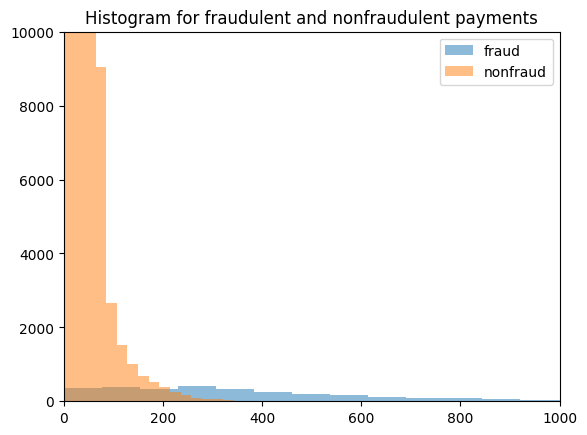

In [ ]:
# Plot histograms of the amounts in fraud and non-fraud data
plt.hist(fraud_data.amount, alpha=0.5, label='fraud',bins=100)
plt.hist(Nonfraud_data.amount, alpha=0.5, label='nonfraud',bins=100)
plt.title("Histogram for fraudulent and nonfraudulent payments")
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

<ipython-input-21-91b7c9815000>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='merchant', y='amount', data=total_amount_by_merchant, palette='viridis')


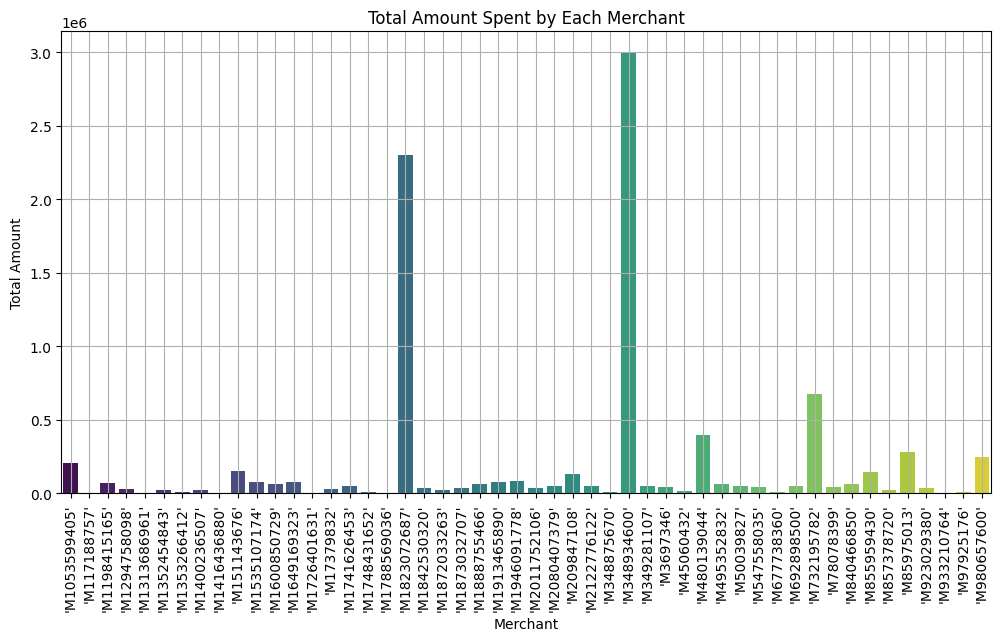

In [ ]:
#Total amount spent by each merchant
plt.figure(figsize=(12, 6))
total_amount_by_merchant = data_bank.groupby('merchant')['amount'].sum().reset_index()
sns.barplot(x='merchant', y='amount', data=total_amount_by_merchant, palette='viridis')
plt.title('Total Amount Spent by Each Merchant')
plt.xlabel('Merchant')
plt.ylabel('Total Amount')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
# drop the column 'zipcodeOri',zipMerchant from the table
data_bank.drop(['zipcodeOri','zipMerchant'],axis=1,inplace=True)

In [ ]:
data_bank.shape

(230666, 8)

In [ ]:
data_bank.head(6)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0.0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0.0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0.0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0.0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0.0
5,0,'C1315400589','3','F','M348934600','es_transportation',25.81,0.0


In [ ]:
# to transform all the column which contains the object or string
col_categorical = data_bank.select_dtypes(include= ['object']).columns
for col in col_categorical:
    data_bank[col] = data_bank[col].astype('category')
data_bank[col_categorical] = data_bank[col_categorical].apply(lambda x: x.cat.codes)
data_bank.head(5)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,209,4,2,30,12,4.55,0.0
1,0,2750,2,2,30,12,39.68,0.0
2,0,2283,4,1,18,12,26.89,0.0
3,0,1649,3,2,30,12,17.25,0.0
4,0,3581,5,2,30,12,35.72,0.0


In [ ]:
# to divide the columns in x and y .iloc[row,column]
X = data_bank.iloc[:,0:7]
y = data_bank.iloc[:,-1]

####Oversampling

In [ ]:
# solving oversampling problem
from imblearn.over_sampling import SMOTE

In [ ]:
oversampl = SMOTE()
X_res, y_res = oversampl.fit_resample(X, y)
y_res = pd.DataFrame(y_res)

In [ ]:
#before oversampling
y.value_counts()

,count
fraud,
0.0,227544
1.0,3122


In [ ]:
# after oversampling
y_res.value_counts()

,count
fraud,
0.0,227544
1.0,227544


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

In [ ]:
X_train

,step,customer,age,gender,merchant,category,amount
80703,30,3932,6,2,30,12,20.180000
307380,0,1473,2,1,47,9,279.884697
82384,30,2774,2,1,18,12,34.970000
412664,13,1456,4,1,39,5,224.584769
32476,12,2057,4,1,9,0,72.790000
...,...,...,...,...,...,...,...
259178,9,1002,4,1,49,10,493.116392
365838,17,4043,2,1,12,9,386.926896
131932,47,290,3,2,30,12,20.370000
146867,52,3528,3,1,18,12,9.760000


In [ ]:
y_train

,fraud
80703,0.0
307380,1.0
82384,0.0
412664,1.0
32476,0.0
...,...
259178,1.0
365838,1.0
131932,0.0
146867,0.0


In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# Define the architecture of the feedforward neural network
input_dim = X_train.shape[1]
output_dim = 1  # For binary classification, we have a single output neuron
hidden_units = [64, 32]  # Number of hidden units in each hidden layer

In [ ]:
# Build the feedforward neural network model
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(input_dim,)))

for units in hidden_units:
    model.add(tf.keras.layers.Dense(units, activation='relu'))

# For binary classification, use 'sigmoid' activation in the output layer
model.add(tf.keras.layers.Dense(output_dim, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=10,
    callbacks=[early_stopping],
)

Epoch 1/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8298 - loss: 6.9712 - val_accuracy: 0.9202 - val_loss: 0.3233
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9040 - loss: 0.3780 - val_accuracy: 0.8372 - val_loss: 0.7381
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9002 - loss: 0.4650 - val_accuracy: 0.9175 - val_loss: 0.3181
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9007 - loss: 0.4339 - val_accuracy: 0.9186 - val_loss: 0.2780
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8999 - loss: 0.4231 - val_accuracy: 0.8308 - val_loss: 0.4641
Epoch 6/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8940 - loss: 0.4831 - val_accuracy: 0.9187 - val_loss: 0.2568
Epoch 7/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9073 - loss: 0.3171 - val_accuracy: 0.9215 - val_loss: 0.2093
Epoch 8/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9118 - loss: 0.2912 - val_accuracy: 0.

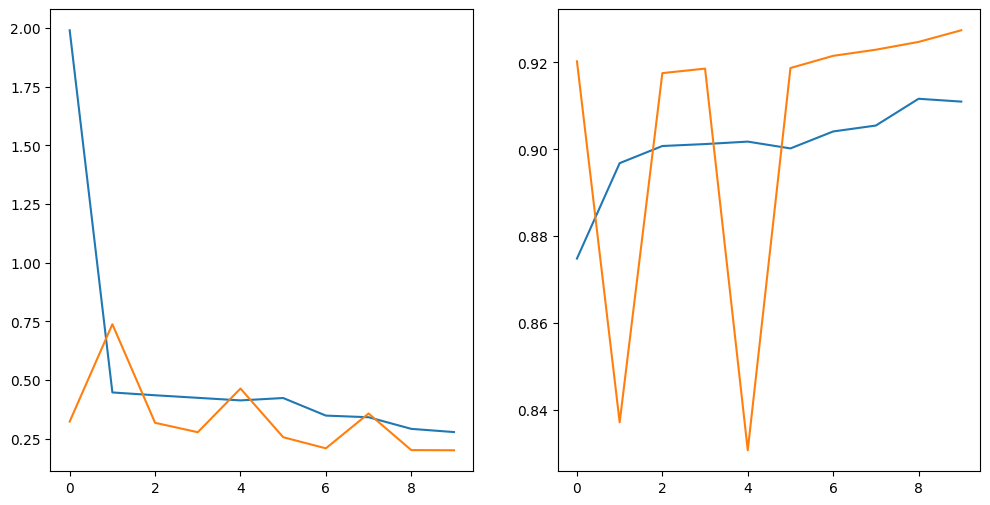

In [ ]:
plt.figure(figsize=(12,6))
history_df = pd.DataFrame(history.history)
plt.subplot(1, 2, 1)
plt.plot(range(10), history.history['loss'])
plt.plot(range(10), history.history['val_loss'])

plt.subplot(1, 2, 2)
plt.plot(range(10), history.history['accuracy'])
plt.plot(range(10), history.history['val_accuracy'])

##CNN

In [ ]:
# Define the architecture of the CNN
input_dim = X_train.shape[1]
output_dim = 1  # For binary classification, we have a single output neuron


In [ ]:
# Reshape input data to match the 2D structure expected by CNNs
# For simplicity, assuming input features can be treated as a 1D array
X_train_cnn = np.expand_dims(X_train, axis=-1)  # Add a channel dimension
X_test_cnn = np.expand_dims(X_test, axis=-1)  # Add a channel dimension


In [ ]:
# Build the CNN model
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(input_dim, 1)))

# Convolutional layers
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())

# Dense layers
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(output_dim, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 5, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 3, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,609 (49.25 KB)

 Trainable params: 12,609 (49.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    X_train_cnn, y_train,
    validation_data=(X_test_cnn, y_test),
    batch_size=512,
    epochs=10,
    callbacks=[early_stopping],
)


Epoch 1/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6397 - loss: 2.0046 - val_accuracy: 0.8527 - val_loss: 0.4167
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8204 - loss: 0.4561 - val_accuracy: 0.8970 - val_loss: 0.3330
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8700 - loss: 0.3465 - val_accuracy: 0.8623 - val_loss: 0.3614
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8370 - loss: 0.4957 - val_accuracy: 0.9064 - val_loss: 0.2742
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8996 - loss: 0.2916 - val_accuracy: 0.9098 - val_loss: 0.2681
Epoch 6/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9020 - loss: 0.2885 - val_accuracy: 0.9223 - val_loss: 0.2329
Epoch 7/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9245 - loss: 0.2367 - val_accuracy: 0.9249 - val_loss: 0.2291
Epoch 8/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9304 - loss: 0.2268 - val_accur

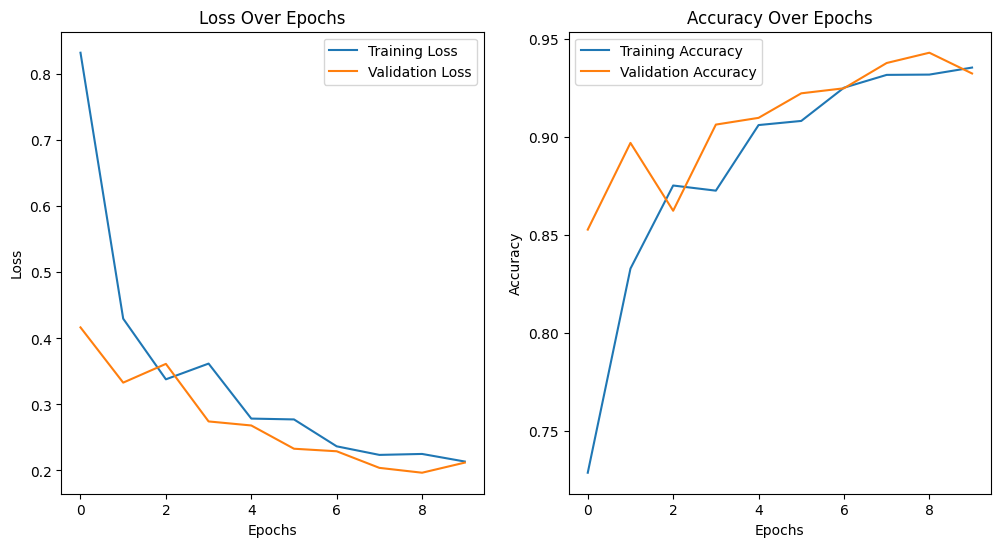

In [ ]:
# Plotting the training history
plt.figure(figsize=(12, 6))
history_df = pd.DataFrame(history.history)

plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')

plt.show()